<a href="https://colab.research.google.com/github/Victorcortes-monroy01/proyectoIA/blob/main/ModelosPreentrenados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
base_directory = '/content/drive/My Drive/Cars Dataset'
train_folder_path = f'{base_directory}/train'
test_folder_path = f'{base_directory}/test'


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical

# Función para cargar imágenes y etiquetas
def load_images_and_labels(base_path, categories, target_size=(128, 128)):
    images = []
    labels = []
    label_dict = {category: idx for idx, category in enumerate(categories)}

    for category in categories:
        category_path = os.path.join(base_path, category)
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image = load_img(image_path, target_size=target_size)
            image = img_to_array(image)
            images.append(image)
            labels.append(label_dict[category])

    return np.array(images), np.array(labels)

# Obtener nombres de categorías
train_files = os.listdir(train_folder_path)
test_files = os.listdir(test_folder_path)

# Cargar datos
train_images, train_labels = load_images_and_labels(train_folder_path, train_files)
test_images, test_labels = load_images_and_labels(test_folder_path, test_files)

# Normalizar imágenes
train_images /= 255.0
test_images /= 255.0

# Convertir etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


ResNet50 (Residual Network con 50 capas) es un modelo de red neuronal convolucional profundo preentrenado en el dataset ImageNet, que contiene millones de imágenes y 1,000 clases.
Peso Preentrenado: Utiliza características generales aprendidas en el entrenamiento con ImageNet.
Capas Congeladas: El parámetro base_model.trainable = False asegura que los pesos preentrenados de ResNet50 no se ajusten durante el entrenamiento inicial, manteniendo las características genéricas de las imágenes.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar el generador de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)
test_generator = datagen.flow(test_images, test_labels, batch_size=32)

# Modelo ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 44s 283ms/step - accuracy: 0.2041 - loss: 1.9520 - val_accuracy: 0.1255 - val_loss: 1.9907
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 188ms/step - accuracy: 0.2469 - loss: 1.8654 - val_accuracy: 0.1415 - val_loss: 1.9958
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - accuracy: 0.2698 - loss: 1.8557 - val_accuracy: 0.1378 - val_loss: 1.9464
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.2842 - loss: 1.8443 - val_accuracy: 0.1328 - val_loss: 2.0185
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - accuracy: 0.2957 - loss: 1.8224 - val_accuracy: 0.1365 - val_loss: 2.0162
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.2859 - loss: 1.8242 - val_accuracy: 0.1378 - val_loss: 1.9766
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.2708 - loss: 1.8225 - val_accuracy: 0.1292 - val_loss: 2.0075
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.2894 - loss: 1.8100 - val

26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step


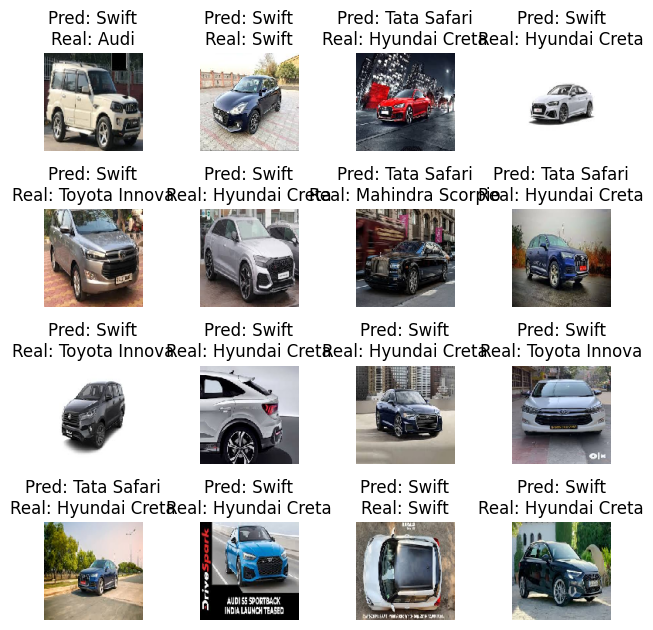

In [ ]:
import matplotlib.pyplot as plt

# Predicciones del modelo
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(test_labels, axis=1)

# Mostrar imágenes con predicciones
h, w = 4, 4
fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w))
nombres = ['Toyota Innova', 'Tata Safari', 'Swift', 'Rolls Royce', 'Mahindra Scorpio', 'Hyundai Creta', 'Audi']

for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(test_images))
        true_label = nombres[y_true_labels[ex]]
        pred_label = nombres[y_pred_labels[ex]]
        axs[i, j].imshow(test_images[ex])
        axs[i, j].set_title(f"Pred: {pred_label}\nReal: {true_label}")
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


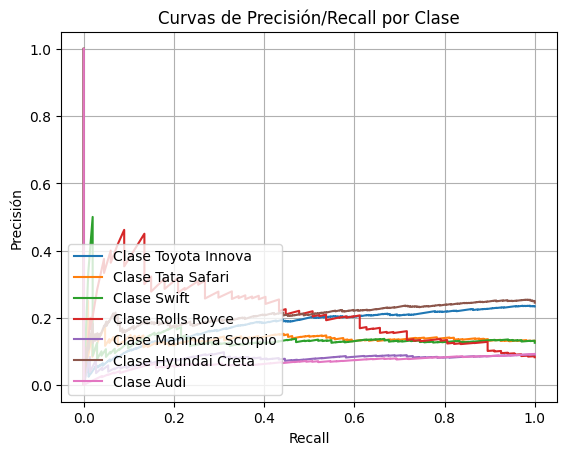

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Cálculo de precisión y recall para cada clase
for i in range(test_labels.shape[1]):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'Clase {nombres[i]}')

plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curvas de Precisión/Recall por Clase')
plt.legend(loc='lower left')
plt.grid()
plt.show()


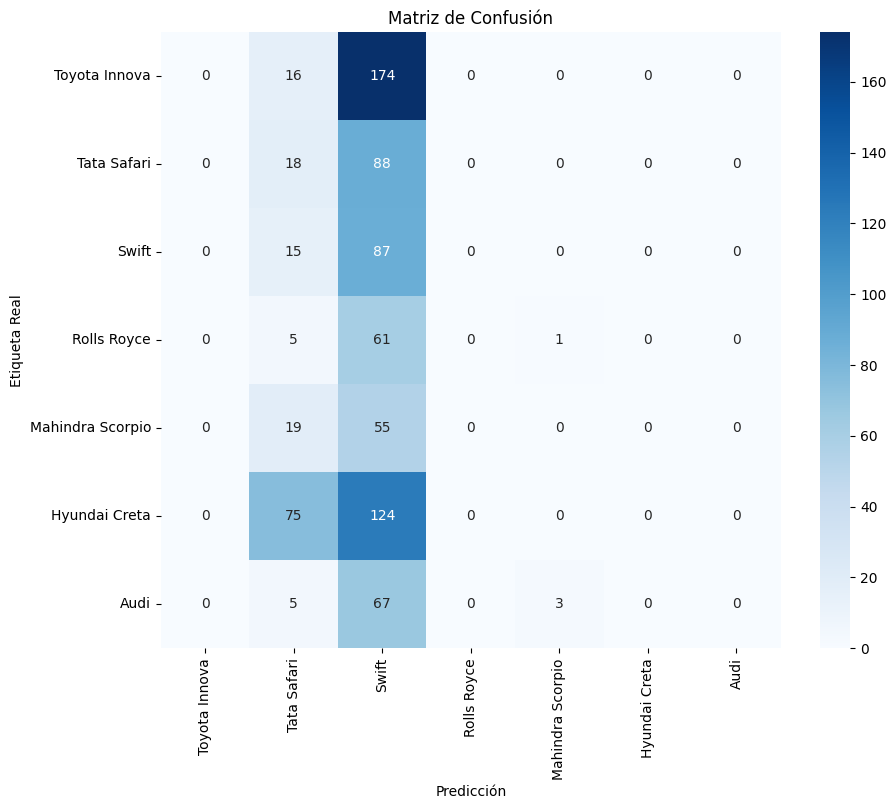

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nombres, yticklabels=nombres)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_true_labels, y_pred_labels, target_names=nombres))


Informe de Clasificación:
                  precision    recall  f1-score   support

   Toyota Innova       0.00      0.00      0.00       190
     Tata Safari       0.12      0.17      0.14       106
           Swift       0.13      0.85      0.23       102
     Rolls Royce       0.00      0.00      0.00        67
Mahindra Scorpio       0.00      0.00      0.00        74
   Hyundai Creta       0.00      0.00      0.00       199
            Audi       0.00      0.00      0.00        75

        accuracy                           0.13       813
       macro avg       0.04      0.15      0.05       813
    weighted avg       0.03      0.13      0.05       813



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Primera iteracion Resnet


In [ ]:
# Descongelar capas del modelo base
base_model.trainable = True

# Reducir la tasa de aprendizaje
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # Tasa de aprendizaje baja para fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con fine-tuning
history_fine = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,  # Más épocas para permitir ajustes en las capas preentrenadas
    verbose=1
)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 112s 480ms/step - accuracy: 0.1199 - loss: 6.6234 - val_accuracy: 0.1255 - val_loss: 9.7857
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.1918 - loss: 3.6951 - val_accuracy: 0.1255 - val_loss: 13.8677
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.2906 - loss: 2.2209 - val_accuracy: 0.1230 - val_loss: 14.7518
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 43s 213ms/step - accuracy: 0.3801 - loss: 1.7488 - val_accuracy: 0.1882 - val_loss: 2.1754
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.4344 - loss: 1.5694 - val_accuracy: 0.1304 - val_loss: 2.1797
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.4960 - loss: 1.4376 - val_accuracy: 0.1267 - val_loss: 2.3149
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.5478 - loss: 1.3183 - val_accuracy: 0.1316 - val_loss: 2.2915
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.5960 - loss

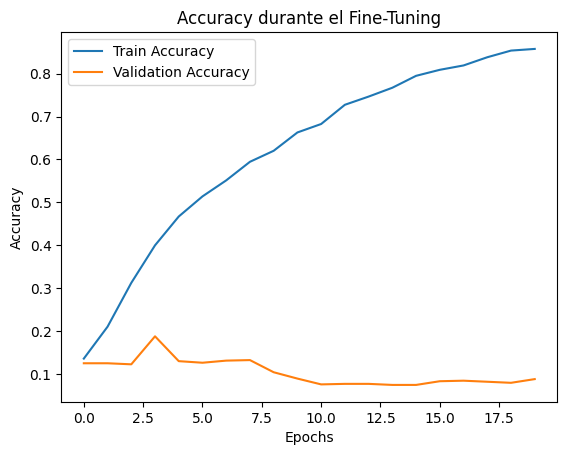

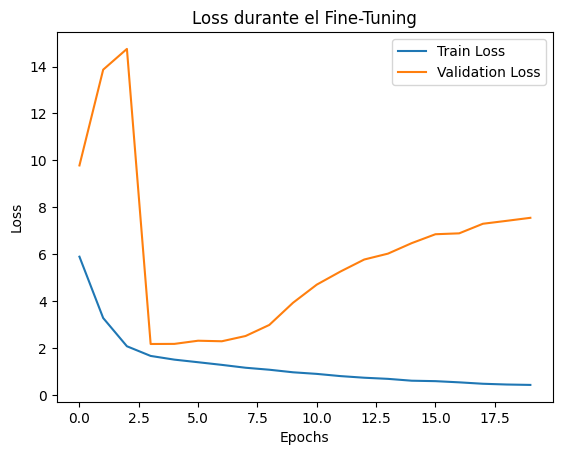

In [ ]:
import matplotlib.pyplot as plt

# Graficar Accuracy
plt.plot(history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el Fine-Tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Graficar Loss
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el Fine-Tuning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step


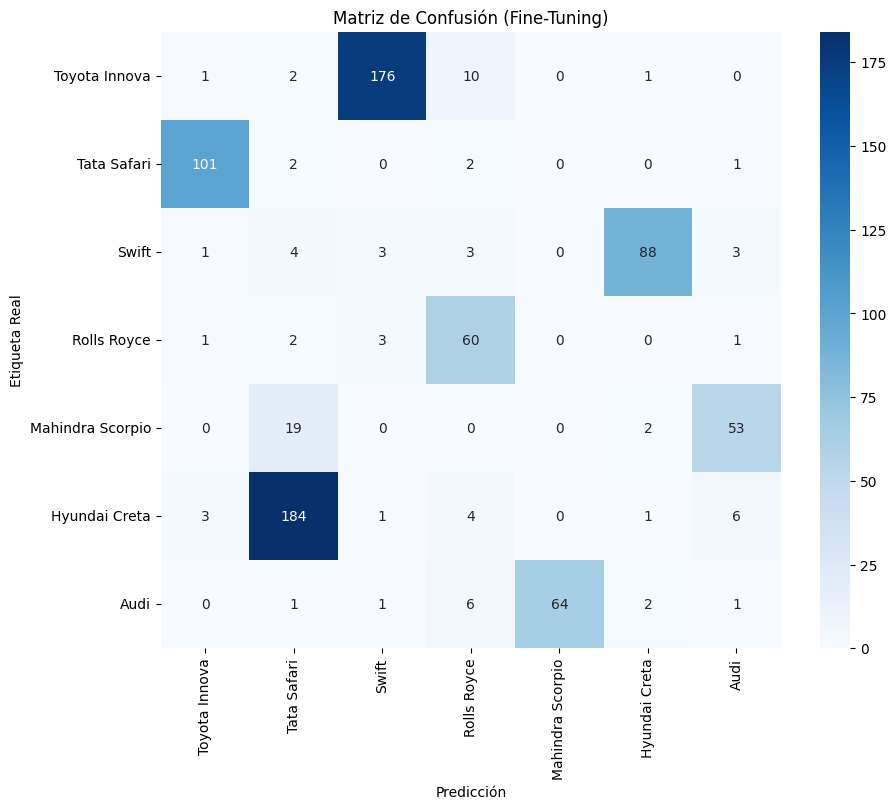

Informe de Clasificación (Fine-Tuning):
                  precision    recall  f1-score   support

   Toyota Innova       0.01      0.01      0.01       190
     Tata Safari       0.01      0.02      0.01       106
           Swift       0.02      0.03      0.02       102
     Rolls Royce       0.71      0.90      0.79        67
Mahindra Scorpio       0.00      0.00      0.00        74
   Hyundai Creta       0.01      0.01      0.01       199
            Audi       0.02      0.01      0.01        75

        accuracy                           0.08       813
       macro avg       0.11      0.14      0.12       813
    weighted avg       0.07      0.08      0.07       813



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Generar predicciones
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(test_labels, axis=1)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nombres, yticklabels=nombres)
plt.title('Matriz de Confusión (Fine-Tuning)')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Informe de Clasificación
print("Informe de Clasificación (Fine-Tuning):")
print(classification_report(y_true_labels, y_pred_labels, target_names=nombres))


In [ ]:
# Ajustar parámetros de aumentación
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)


In [ ]:
from tensorflow.keras.regularizers import l2

# Ajustar hiperparámetros manualmente
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Aumentar regularización
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compilar con tasa de aprendizaje ajustada
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar nuevamente
history_tuned = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 107s 480ms/step - accuracy: 0.5946 - loss: 5.6590 - val_accuracy: 0.0959 - val_loss: 13.7730
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 207ms/step - accuracy: 0.8188 - loss: 4.5805 - val_accuracy: 0.0713 - val_loss: 12.2420
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - accuracy: 0.8572 - loss: 4.0640 - val_accuracy: 0.0763 - val_loss: 12.4809
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.8795 - loss: 3.5808 - val_accuracy: 0.0910 - val_loss: 11.5764
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.8832 - loss: 3.2235 - val_accuracy: 0.0898 - val_loss: 10.8409
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - accuracy: 0.9094 - loss: 2.8138 - val_accuracy: 0.0898 - val_loss: 12.1541
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.9220 - loss: 2.5045 - val_accuracy: 0.0873 - val_loss: 12.2315
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 43s 218ms/step - accuracy: 0.9372 - loss: 2.20

In [ ]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Convertir etiquetas de one-hot encoding a enteros
train_labels_sparse = np.argmax(train_labels, axis=1)  # De (None, 7) a (None,)
test_labels_sparse = np.argmax(test_labels, axis=1)    # De (None, 7) a (None,)

# Paso 2: Configurar el generador de datos con aumentación
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(train_images, train_labels_sparse, batch_size=32)

# Paso 3: Configurar el modelo ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Descongelar capas del modelo base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Salida para 7 clases
])

# Paso 4: Compilar el modelo con pérdida focal
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Paso 5: Entrenar el modelo
history_focal = model.fit(
    train_generator,
    validation_data=(test_images, test_labels_sparse),  # Validación con etiquetas como enteros
    epochs=20,
    verbose=1
)

# Paso 6: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels_sparse, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 100s 440ms/step - accuracy: 0.3206 - loss: 1.9550 - val_accuracy: 0.2337 - val_loss: 2.0153
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - accuracy: 0.7104 - loss: 0.8630 - val_accuracy: 0.2337 - val_loss: 2.1550
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.8338 - loss: 0.5185 - val_accuracy: 0.2337 - val_loss: 2.4956
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.8745 - loss: 0.4074 - val_accuracy: 0.2337 - val_loss: 2.1899
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9050 - loss: 0.2889 - val_accuracy: 0.2300 - val_loss: 2.0765
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.9254 - loss: 0.2350 - val_accuracy: 0.1697 - val_loss: 2.8098
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.9362 - loss: 0.2155 - val_accuracy: 0.0713 - val_loss: 4.4068
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 197ms/step - accuracy: 0.9601 - loss: 

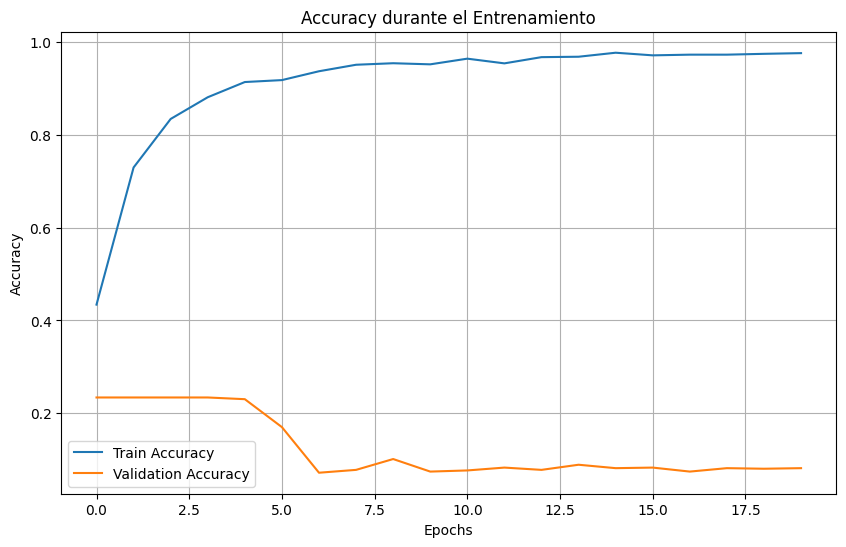

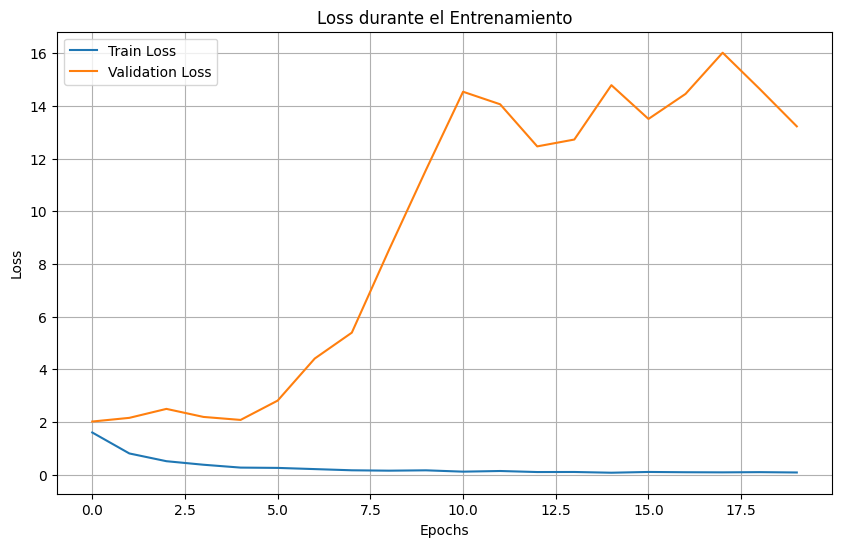

In [ ]:
import matplotlib.pyplot as plt

# Graficar Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_focal.history['accuracy'], label='Train Accuracy')
plt.plot(history_focal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Graficar Loss
plt.figure(figsize=(10, 6))
plt.plot(history_focal.history['loss'], label='Train Loss')
plt.plot(history_focal.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el Entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step


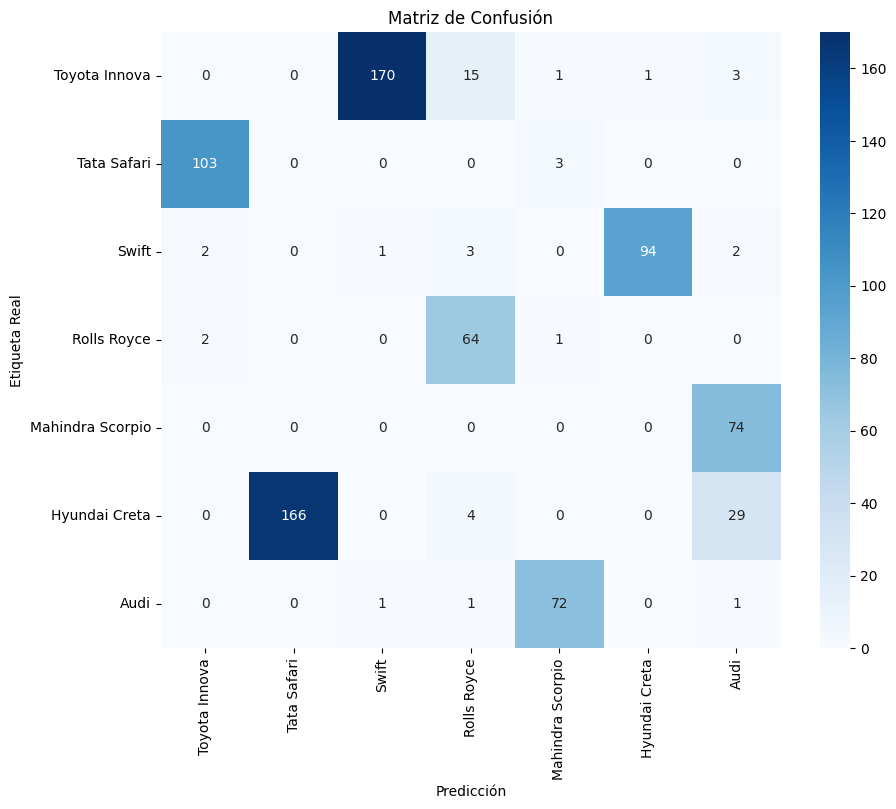

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Generar predicciones del modelo
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convertir probabilidades a etiquetas

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels_sparse, y_pred_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nombres, yticklabels=nombres)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()


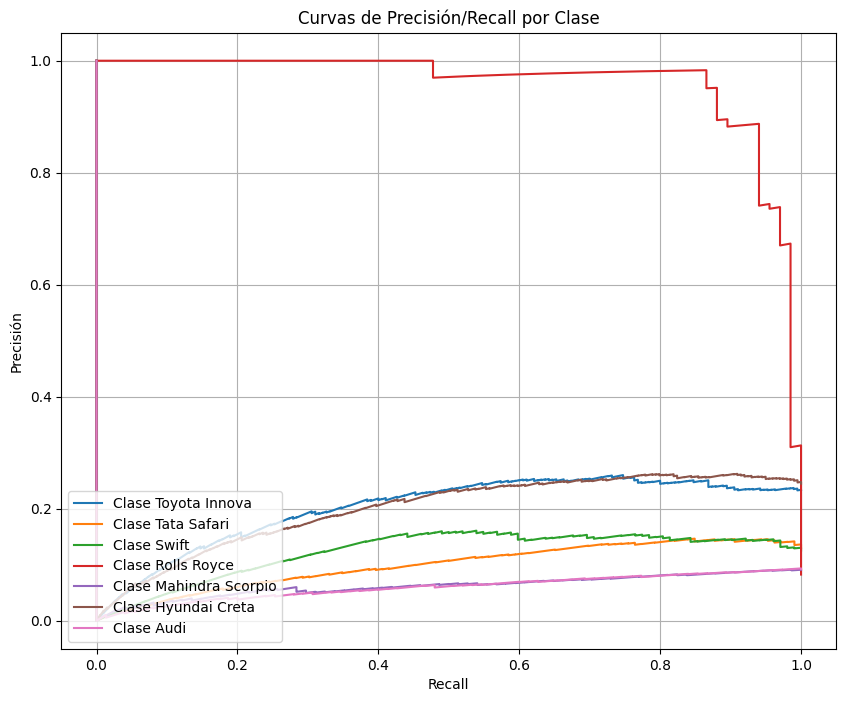

In [ ]:
from sklearn.metrics import precision_recall_curve

# Graficar precisión y recall para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(nombres)):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], y_pred[:, i])
    plt.plot(recall, precision, label=f'Clase {nombres[i]}')

plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curvas de Precisión/Recall por Clase')
plt.legend(loc='lower left')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generar el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(test_labels_sparse, y_pred_labels, target_names=nombres))


Informe de Clasificación:
                  precision    recall  f1-score   support

   Toyota Innova       0.00      0.00      0.00       190
     Tata Safari       0.00      0.00      0.00       106
           Swift       0.01      0.01      0.01       102
     Rolls Royce       0.74      0.96      0.83        67
Mahindra Scorpio       0.00      0.00      0.00        74
   Hyundai Creta       0.00      0.00      0.00       199
            Audi       0.01      0.01      0.01        75

        accuracy                           0.08       813
       macro avg       0.11      0.14      0.12       813
    weighted avg       0.06      0.08      0.07       813



**MobileNet**


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paso 1: Configurar el generador de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(train_images, train_labels_sparse, batch_size=32)

# Paso 2: Configurar MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Inicialmente congelamos las capas del modelo base

# Crear el modelo completo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),  # Capa densa con 128 neuronas
    Dropout(0.5),
    Dense(7, activation='softmax')  # Capa de salida para 7 clases
])

# Paso 3: Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Paso 4: Entrenar el modelo
history_mobilenet = model.fit(
    train_generator,
    validation_data=(test_images, test_labels_sparse),
    epochs=20,
    verbose=1
)

# Paso 5: Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images, test_labels_sparse, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.3514 - loss: 1.9118 - val_accuracy: 0.0812 - val_loss: 3.0674
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.5984 - loss: 1.1182 - val_accuracy: 0.0836 - val_loss: 3.9279
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 150ms/step - accuracy: 0.6694 - loss: 0.9448 - val_accuracy: 0.0713 - val_loss: 4.5509
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.7269 - loss: 0.7853 - val_accuracy: 0.0763 - val_loss: 5.1272
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.7565 - loss: 0.6954 - val_accuracy: 0.0861 - val_loss: 5.7745
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.7542 - loss: 0.7028 - val_accuracy: 0.0787 - val_loss: 6.1639
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.7641 - loss: 0.6788 - val_accuracy: 0.0713 - val_loss: 5.6284
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.7827 - loss: 0.6227 - val

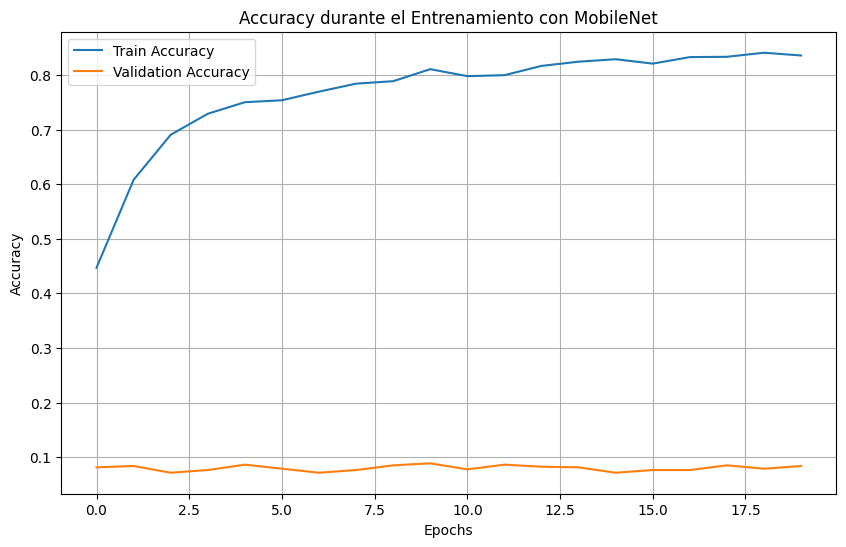

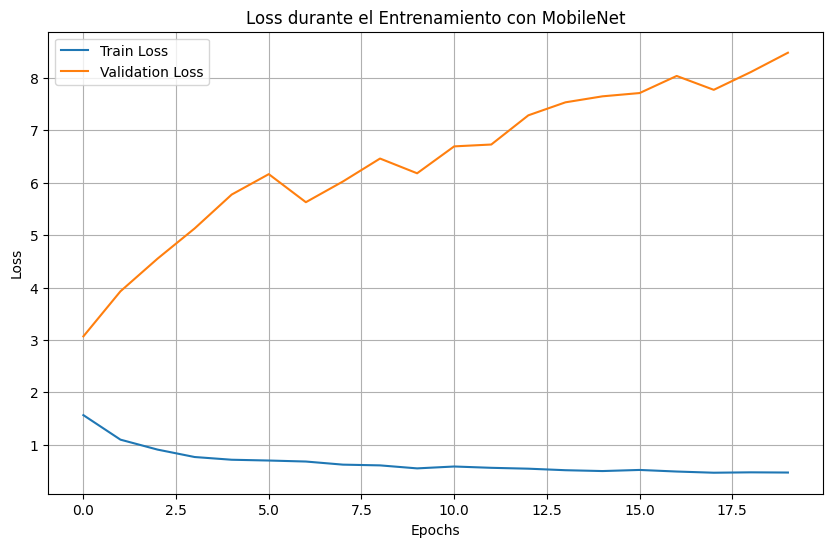

In [ ]:
# Graficar Accuracy y Loss
plt.figure(figsize=(10, 6))
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el Entrenamiento con MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el Entrenamiento con MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Descongelar capas del modelo base
base_model.trainable = True

# Reducir la tasa de aprendizaje
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar con fine-tuning
history_fine_tuning = model.fit(
    train_generator,
    validation_data=(test_images, test_labels_sparse),
    epochs=10,
    verbose=1
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 55s 285ms/step - accuracy: 0.6037 - loss: 1.1075 - val_accuracy: 0.0763 - val_loss: 8.0715
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.7075 - loss: 0.8255 - val_accuracy: 0.0800 - val_loss: 7.9635
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step - accuracy: 0.7677 - loss: 0.6425 - val_accuracy: 0.0836 - val_loss: 8.1374
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - accuracy: 0.7859 - loss: 0.6288 - val_accuracy: 0.0873 - val_loss: 8.3903
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.8013 - loss: 0.5735 - val_accuracy: 0.0873 - val_loss: 8.6854
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.8220 - loss: 0.4911 - val_accuracy: 0.0824 - val_loss: 8.8792
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.8447 - loss: 0.4485 - val_accuracy: 0.0873 - val_loss: 9.2401
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.8451 - loss: 0

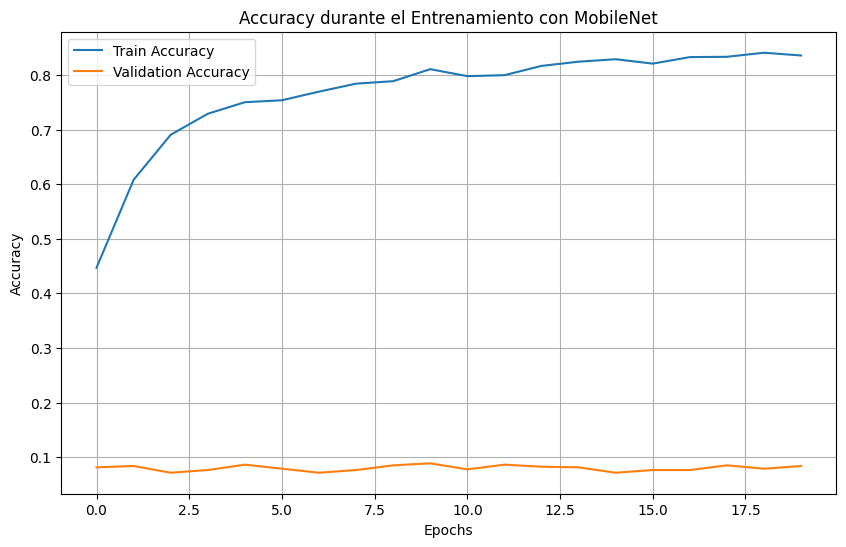

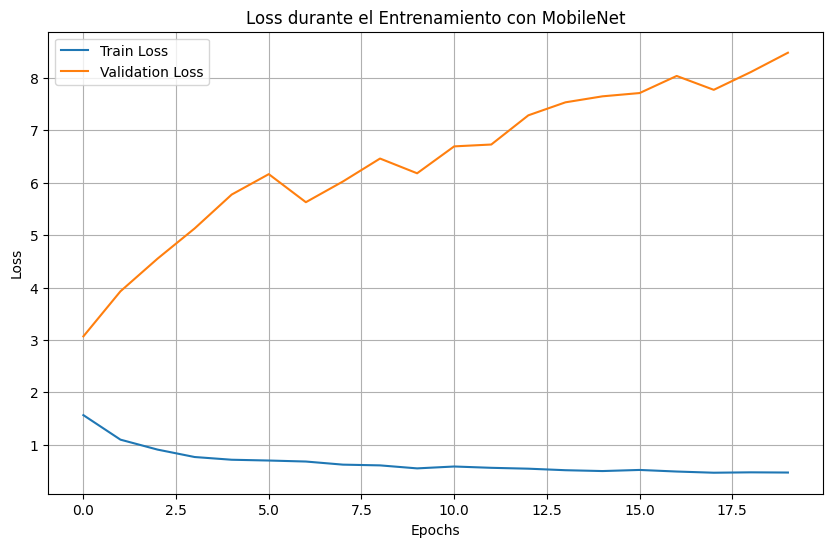

In [ ]:
# Graficar Accuracy y Loss
plt.figure(figsize=(10, 6))
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el Entrenamiento con MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el Entrenamiento con MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Importar librerías necesarias
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar el generador de datos con aumentación
datagen = ImageDataGenerator(
    rotation_range=25,  # Rotación más agresiva
    width_shift_range=0.3,  # Aumento en el desplazamiento horizontal
    height_shift_range=0.3,  # Aumento en el desplazamiento vertical
    shear_range=0.3,  # Aumento en el corte de imágenes
    zoom_range=0.3,  # Aumento en el zoom
    horizontal_flip=True
)

train_generator = datagen.flow(train_images, train_labels_sparse, batch_size=64)  # Cambiar tamaño de lote

# Configurar MobileNet con ajuste de hiperparámetros
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Descongelar capas para fine-tuning

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Incrementar número de neuronas
    Dropout(0.6),  # Aumentar Dropout para regularización
    Dense(7, activation='softmax')  # Salida para 7 clases
])

# Compilar el modelo con una tasa de aprendizaje más baja para fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # Reducir tasa de aprendizaje
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con los nuevos hiperparámetros
history_tuned = model.fit(
    train_generator,
    validation_data=(test_images, test_labels_sparse),
    epochs=20,
    verbose=1
)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 538ms/step - accuracy: 0.1358 - loss: 3.6868 - val_accuracy: 0.1476 - val_loss: 2.3532
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 266ms/step - accuracy: 0.1780 - loss: 2.8751 - val_accuracy: 0.1574 - val_loss: 2.2613
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.2458 - loss: 2.4182 - val_accuracy: 0.1353 - val_loss: 2.3043
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.2795 - loss: 2.2573 - val_accuracy: 0.1181 - val_loss: 2.3681
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 269ms/step - accuracy: 0.2967 - loss: 2.1439 - val_accuracy: 0.1181 - val_loss: 2.4341
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.3394 - loss: 2.0220 - val_accuracy: 0.1058 - val_loss: 2.4956
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - accuracy: 0.3559 - loss: 1.8496 - val_accuracy: 0.0959 - val_loss: 2.5674
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.3876 - loss: 1.8029 - val_accu

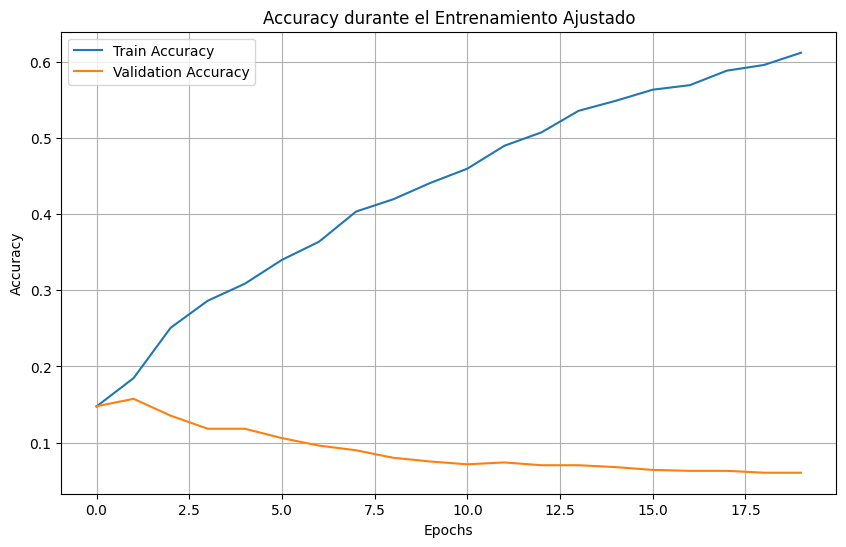

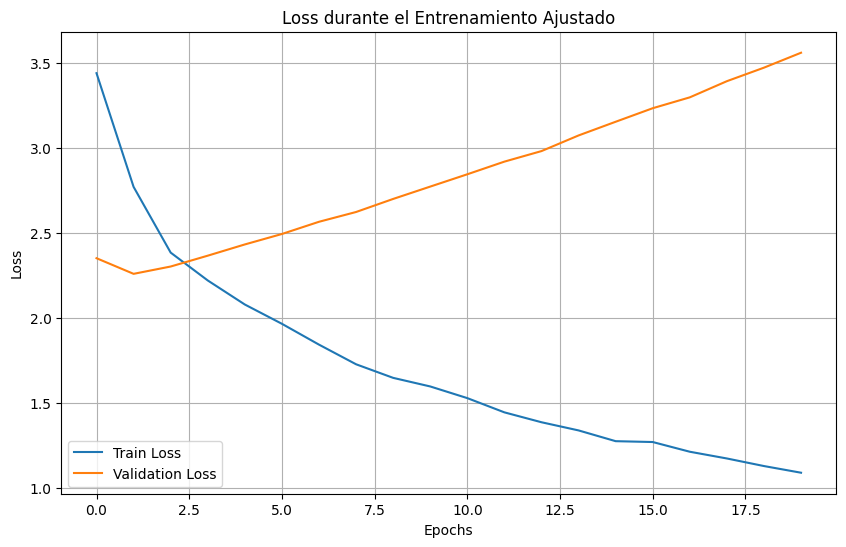

In [ ]:
# Graficar Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_tuned.history['accuracy'], label='Train Accuracy')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el Entrenamiento Ajustado')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Graficar Loss
plt.figure(figsize=(10, 6))
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el Entrenamiento Ajustado')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step


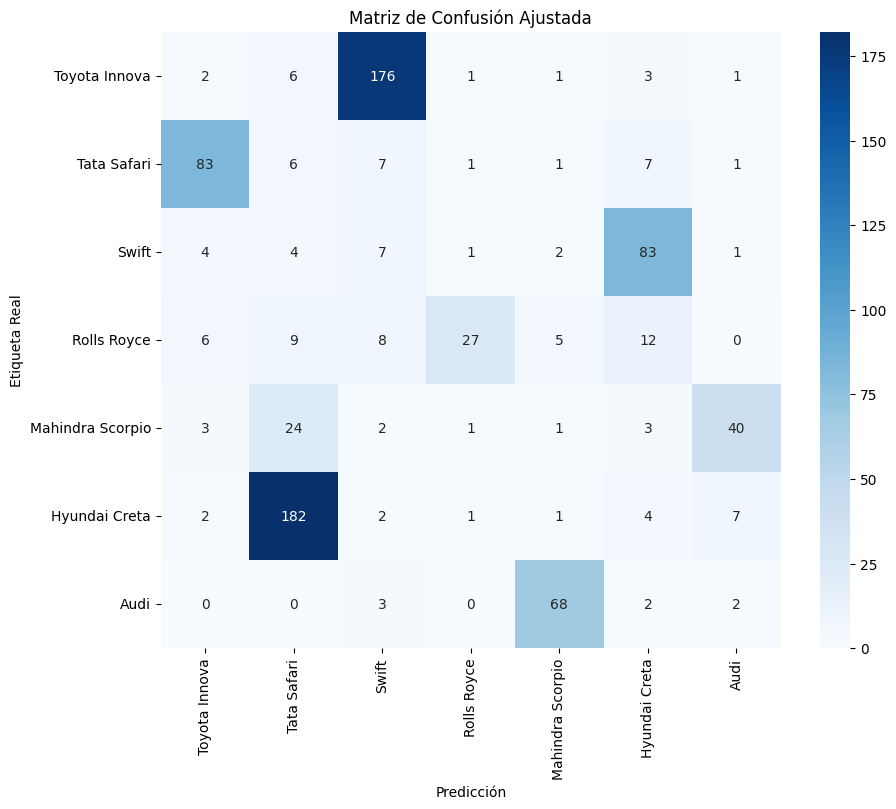

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar predicciones
y_pred_tuned = model.predict(test_images)
y_pred_labels_tuned = np.argmax(y_pred_tuned, axis=1)

# Matriz de Confusión
conf_matrix_tuned = confusion_matrix(test_labels_sparse, y_pred_labels_tuned)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", xticklabels=nombres, yticklabels=nombres)
plt.title('Matriz de Confusión Ajustada')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()


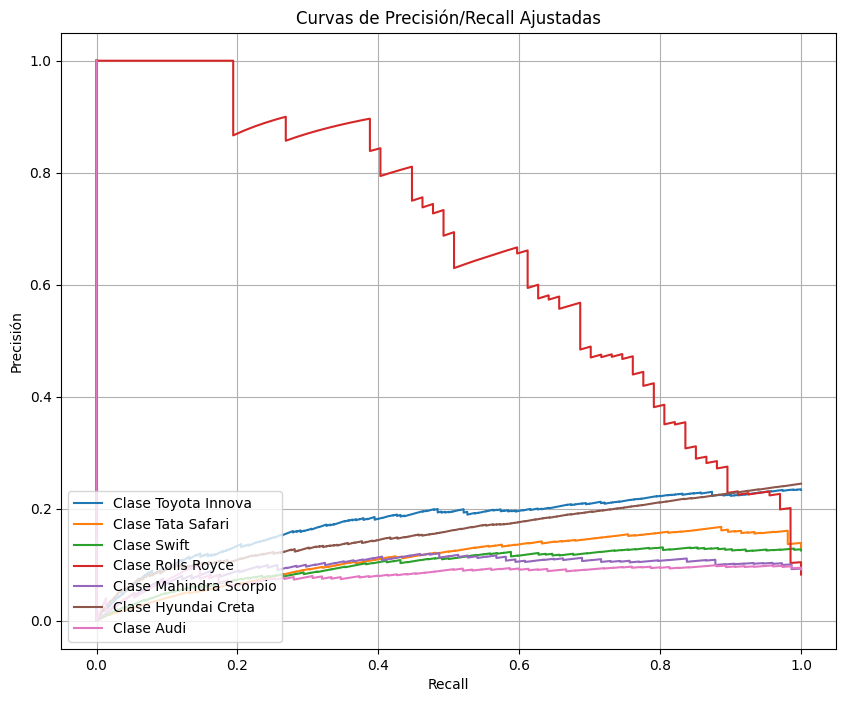

In [ ]:
from sklearn.metrics import precision_recall_curve

# Graficar precisión y recall para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(nombres)):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], y_pred_tuned[:, i])
    plt.plot(recall, precision, label=f'Clase {nombres[i]}')

plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curvas de Precisión/Recall Ajustadas')
plt.legend(loc='lower left')
plt.grid()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Aplanar imágenes para SMOTE
train_images_flat = train_images.reshape(len(train_images), -1)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
train_images_smote, train_labels_smote = smote.fit_resample(train_images_flat, train_labels_sparse)

# Restaurar la forma original de las imágenes
train_images_smote = train_images_smote.reshape(-1, 128, 128, 3)

print("Dataset después de SMOTE:")
print(f"Imágenes: {train_images_smote.shape}")
print(f"Etiquetas: {train_labels_smote.shape}")


KeyboardInterrupt: 